In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [116]:
iris=load_iris()

In [117]:
iris_data=pd.DataFrame(iris.data)

In [118]:
iris_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [119]:
column=["Sepal Length",
"Sepal Width",
"Petal Length",
"Petal Width","Target"]

In [120]:
iris_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [121]:
y = iris.target


In [122]:
iris=np.concatenate([iris_data,y.reshape(-1,1)],axis=1)

In [123]:
iris=pd.DataFrame(iris)

In [124]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [125]:
iris.columns=column

In [126]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [127]:
iris["Target"]=iris["Target"].astype(int)

In [128]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [129]:
filtered_iris = iris[(iris['Target'] == 0) | (iris['Target'] == 1)]
filtered_iris.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [130]:
filtered_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  100 non-null    float64
 1   Sepal Width   100 non-null    float64
 2   Petal Length  100 non-null    float64
 3   Petal Width   100 non-null    float64
 4   Target        100 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 4.3 KB


In [131]:
filtered_iris['Target'].value_counts()

Target
0    50
1    50
Name: count, dtype: int64

In [132]:
filtered_iris["bias"]=1
X=filtered_iris.drop("Target",axis=1)
y=filtered_iris["Target"]

C:\Users\ayesh\AppData\Local\Temp\ipykernel_2860\1301580726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_iris["bias"]=1


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Single Layered Perceptron

In [135]:

weights = np.random.rand(5)
weights = np.random.uniform(-1, 1, 5)
weights


array([-0.73418131, -0.58614437, -0.49941706, -0.43272304,  0.34066441])

In [136]:
def predict(w,x):
a    weighted_sum=np.dot(x,w)
    if weighted_sum >= 0:
        return 1
    else:
        return 0    


In [137]:
def perceptron_train(X, y, learning_rate, epochs):
    weights = np.random.uniform(-1, 1, 5)
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            y_pred = predict(weights, X.iloc[i])
            weights += learning_rate * (y.iloc[i] - y_pred) * X.iloc[i]
    return weights

In [138]:
learning_rates = [0.01, 0.05, 0.1]
epochs_list = [50, 100, 150]

In [141]:
plt.figure(figsize=(35, 10))
i = 1

<Figure size 3500x1000 with 0 Axes>

learning_rate=0.01, epochs=50, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


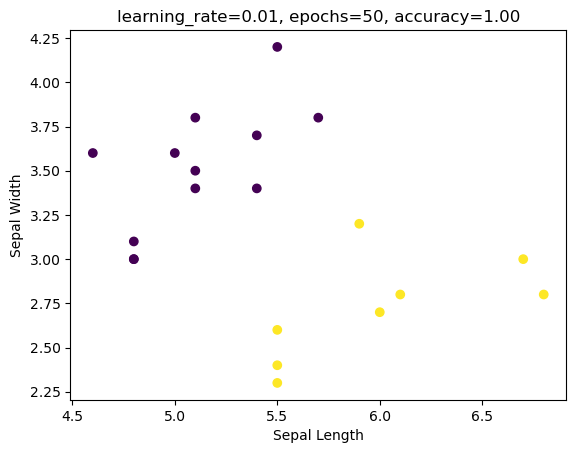

learning_rate=0.01, epochs=100, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


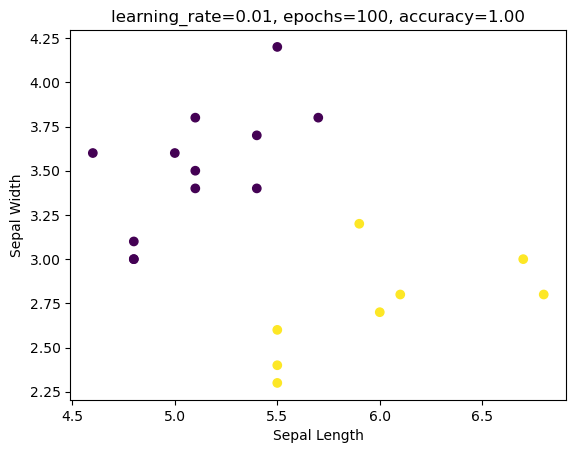

learning_rate=0.01, epochs=150, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


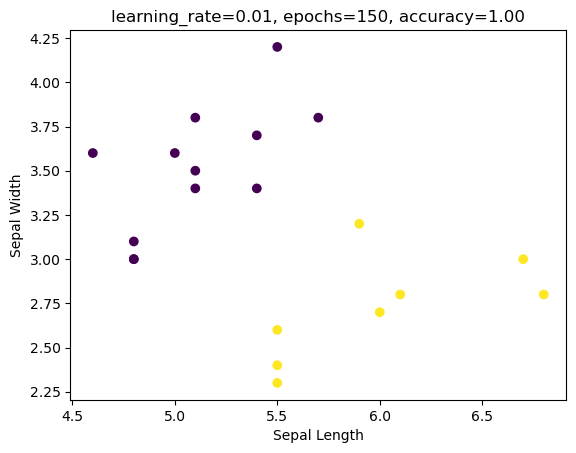

learning_rate=0.05, epochs=50, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


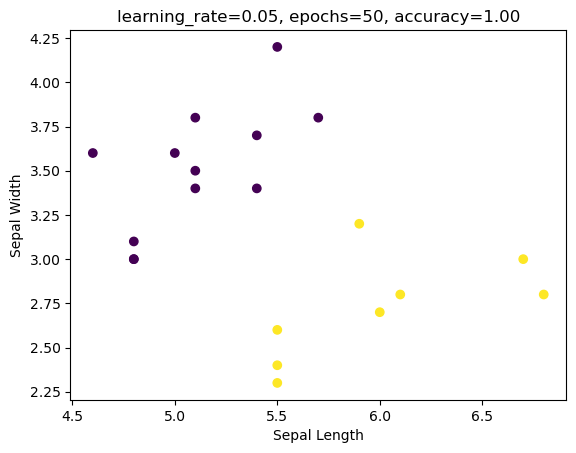

learning_rate=0.05, epochs=100, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


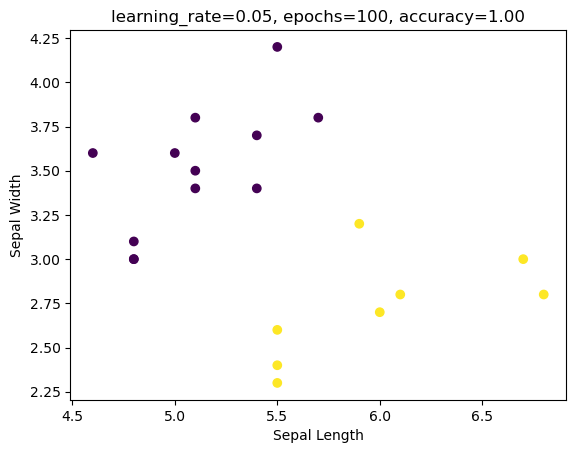

learning_rate=0.05, epochs=150, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


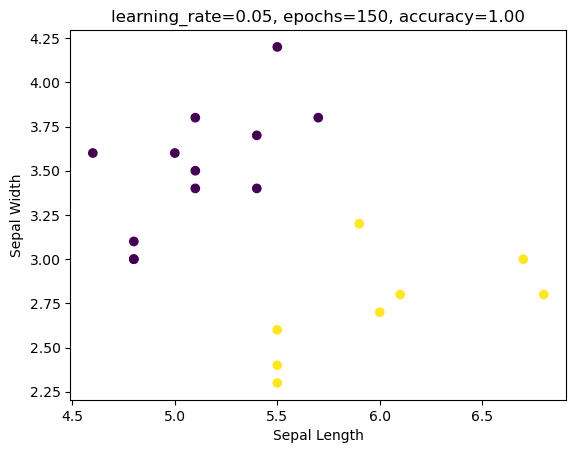

learning_rate=0.1, epochs=50, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


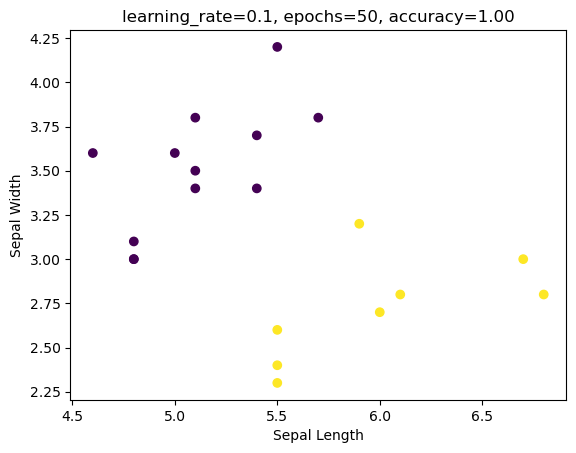

learning_rate=0.1, epochs=100, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


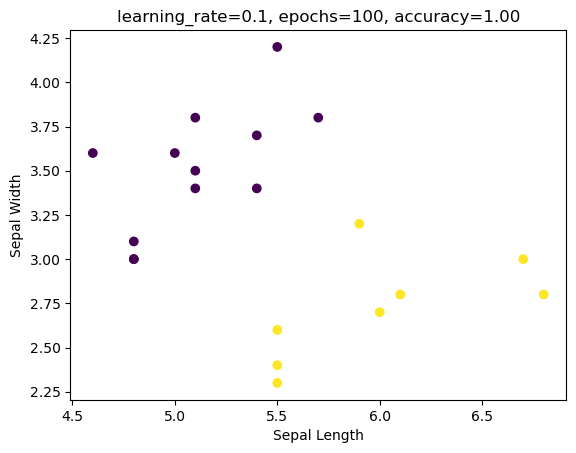

learning_rate=0.1, epochs=150, accuracy=1.00, precision=1.00, recall=1.00, f1=1.00


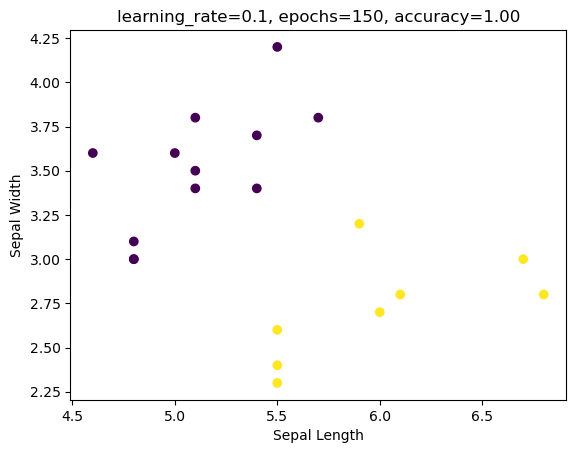

In [152]:
for lr in learning_rates:
    for eponum in epochs_list:
        weights = perceptron_train(X_train, y_train, lr, eponum)
        y_pred = [predict(weights, X_test.iloc[i]) for i in range(X_test.shape[0])]
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f'learning_rate={lr}, epochs={eponum}, accuracy={acc:.2f}, precision={precision:.2f}, recall={recall:.2f}, f1={f1:.2f}')
        plt.title(f'learning_rate={lr}, epochs={eponum}, accuracy={acc:.2f}')
        plt.scatter(X_test['Sepal Length'], X_test['Sepal Width'], c=y_pred)
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.show()
        i += 1
